In [1]:
!pip install scikit-learn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 802.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.7 MB 1.9 MB/s eta 0:00:06
   ---------------------------------------- 0.1/10.7 MB 1.3 MB/s eta 0:00:09
    --------------------------------------- 0.2/10.7 MB 1.3 MB/s eta 0:00:09
    --------------------------------------- 0.2/10.7 MB 1.3 MB/s eta 0:00:09
   - -------------------------------------- 0.3/10.7 MB 1.4 MB/s eta 0:00:08
   - -------------------------------------- 0.3/10.7 MB 1.4 MB/s eta 0:00:08
   - -------------------------------------- 0.4/10.7 MB 1.3 MB/s eta 0:00:08
   - -------------------------------------- 0.5/10.7 MB 1.3 MB/s eta 0:00:08
   -- ------------------------------------- 0.6/10.7 MB 1.4 MB/s eta 0:00:08
   --


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Happy\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load your dataset
df = pd.read_csv("customer_booking.csv", encoding='ISO-8859-1')

# Separate features and target
X = df.drop("booking_complete", axis=1)
y = df["booking_complete"]

# Identify categorical columns
categorical_cols = X.select_dtypes(include="object").columns.tolist()

# Define preprocessing for categorical data
preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)],
    remainder="passthrough"
)

# Create a pipeline
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.54      0.13      0.21      1480

    accuracy                           0.86     10000
   macro avg       0.71      0.56      0.56     10000
weighted avg       0.82      0.86      0.81     10000

Confusion Matrix:
[[8360  160]
 [1289  191]]


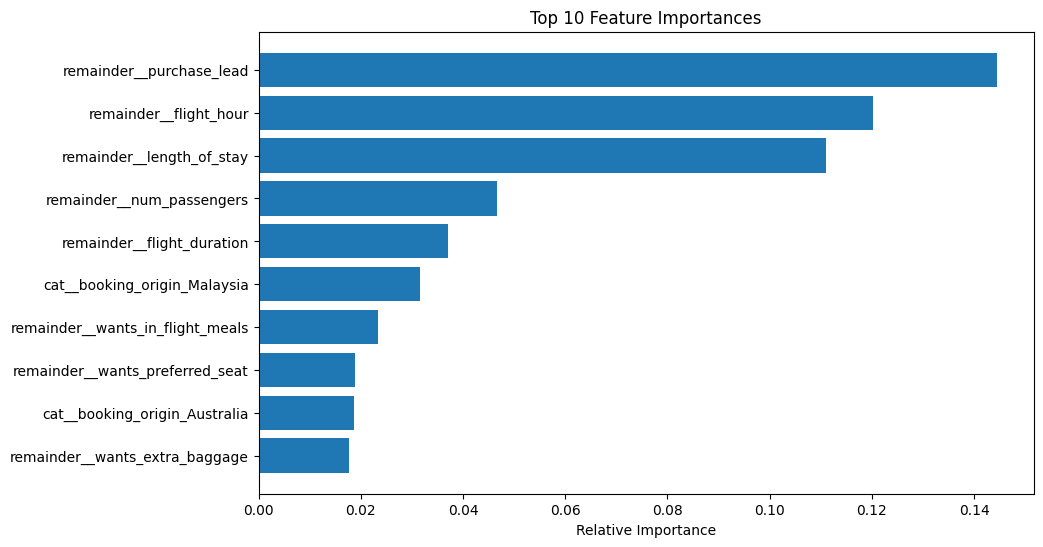

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature names after encoding
feature_names = pipeline.named_steps["preprocessor"].get_feature_names_out()
importances = pipeline.named_steps["classifier"].feature_importances_

# Plot feature importances
indices = np.argsort(importances)[-10:]  # Top 10
plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()
